In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [2]:
df = pd.read_csv('/content/global_power_plant_database.csv')

df.shape

df.head()

<ipython-input-2-1d074ad1e69d>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
# Check for missing values
print(df.isnull().sum())

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [12]:
# Drop columns with any missing values
df_cleaned = df.drop(columns=['country', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source','estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017'])

# Display the columns and count of missing values after deletion
print("\nColumns with missing values after deletion:")
print(df_cleaned.isnull().sum())


Columns with missing values after deletion:
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year    17489
dtype: int64


In [7]:
### Exploratory Data Analysis (EDA)
# Summary statistics for numerical columns
print(df_cleaned[['capacity_mw']].describe())

        capacity_mw
count  34936.000000
mean     163.355148
std      489.636072
min        1.000000
25%        4.900000
50%       16.745000
75%       75.344250
max    22500.000000


In [8]:
# Explore Distribution of Power Plants
# Count of power plants by country
print(df_cleaned['country_long'].value_counts())

# Count of power plants by fuel type
print(df_cleaned['primary_fuel'].value_counts())

country_long
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
                            ... 
Lesotho                        1
Western Sahara                 1
Suriname                       1
Palestine                      1
Guinea-Bissau                  1
Name: count, Length: 167, dtype: int64
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64


In [9]:
### Statistical Analysis
# Analyze Power Output by Fuel Type
df1 = df_cleaned.copy()
fuel_stats = df1.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std'])
print(fuel_stats)

                       mean      median          std
primary_fuel                                        
Biomass           23.972938     9.45000    39.461805
Coal             843.579828   600.00000   888.187187
Cogeneration      98.731707    31.90000   283.428252
Gas              373.449375   147.50000   560.934146
Geothermal        67.130952    30.00000   114.640890
Hydro            147.171551    20.00000   549.809328
Nuclear         2091.855179  1888.00000  1303.509273
Oil              112.878754     9.00000   392.009039
Other             84.020000    40.00000   145.891392
Petcoke          202.048125    65.48875   476.986459
Solar             17.657039     5.80000    41.939412
Storage           12.683704     4.90000    35.574631
Waste             13.809657     4.80000    20.582503
Wave and Tidal    55.220000     5.00000   101.440708
Wind              49.224126    27.00000   106.138355


In [10]:
# Example: Hypothesis test to compare mean power output between two fuel types
fuel_type_1 = df[df1['primary_fuel'] == 'Coal']['capacity_mw']
fuel_type_2 = df[df1['primary_fuel'] == 'Gas']['capacity_mw']

t_stat, p_value = stats.ttest_ind(fuel_type_1, fuel_type_2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 25.788324829336716, p-value: 1.5774516338525773e-139


P-value shows, that there is a significant difference between coal and gas stations in their capacity.

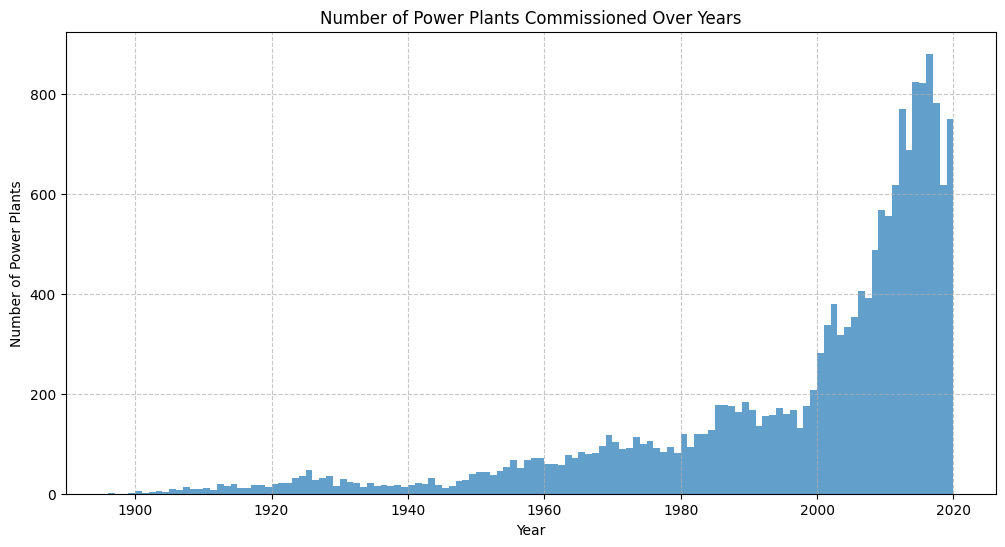

In [14]:
### Time Series Analysis
# Ensure commissioning_year is numeric
df_cleaned['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')

df2 = df_cleaned.copy()

df2 = df2.dropna(subset=['commissioning_year'])

# Plot the trend of power plants commissioned over the years
plt.figure(figsize=(12, 6))
df2['commissioning_year'].dropna().astype(int).hist(bins=range(int(df['commissioning_year'].min()), int(df2['commissioning_year'].max()) + 1), alpha=0.7)
plt.title('Number of Power Plants Commissioned Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




<Figure size 1400x700 with 0 Axes>

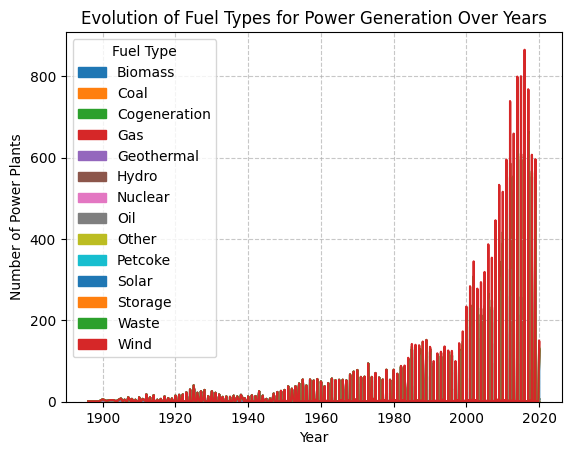

In [15]:
# Group by year and fuel type, then count
fuel_evolution = df2.groupby(['commissioning_year', 'primary_fuel']).size().unstack().fillna(0)

# Plot evolution of fuel types over years
plt.figure(figsize=(14, 7))
fuel_evolution.plot(kind='area', stacked=True)
plt.title('Evolution of Fuel Types for Power Generation Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [25]:
#Geographical Distribution of Power Plants
# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    df_cleaned,
    lat='latitude',
    lon='longitude',
    hover_name='name',
    hover_data={'latitude': False, 'longitude': False},
    color='primary_fuel',
    zoom=3,
    height=600,
    title="Power Plants by Fuel Type"
)

# Update layout for mapbox
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox_zoom=3,
    mapbox_center={'lat': df['latitude'].mean(), 'lon': df['longitude'].mean()},
    margin={'r': 0, 't': 40, 'l': 0, 'b': 0}
)

# Display the map inline
fig.show()

In [26]:
# Create a matrix of power plant capacities
capacity_matrix = df_cleaned[['capacity_mw', 'latitude', 'longitude']].dropna().values

# Compute eigenvalues and eigenvectors
cov_matrix = np.cov(capacity_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [239888.34493566   6005.22827679    509.89320204]
Eigenvectors:
 [[ 9.99690263e-01 -2.48871486e-02  9.13937503e-05]
 [-6.24482185e-04 -2.14133001e-02  9.99770514e-01]
 [ 2.48794803e-02  9.99460905e-01  2.14222092e-02]]


This data shows that the most variability we have insight the capacity_mw column, and it's most significant for the whole analysis.


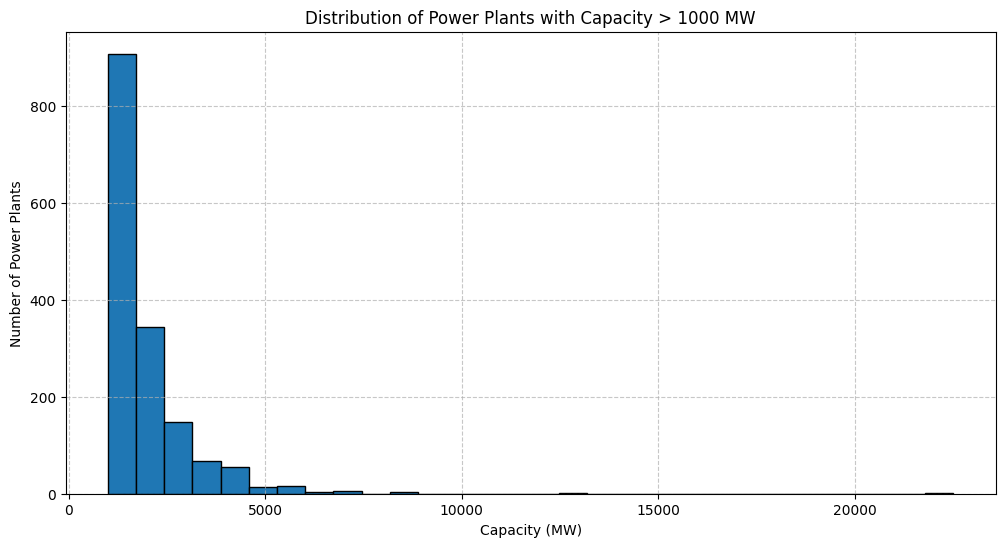

In [27]:
# Filtering data using NumPy
capacity_array = df_cleaned['capacity_mw'].to_numpy()
filtered_indices = np.where(capacity_array > 1000)
filtered_data = df_cleaned.iloc[filtered_indices]

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['capacity_mw'], bins=30, edgecolor='black')
plt.title('Distribution of Power Plants with Capacity > 1000 MW')
plt.xlabel('Capacity (MW)')
plt.ylabel('Number of Power Plants')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

There are not so many powerplants with Capacity more than 2500 MW